In [3]:
from scipy import stats
import numpy
import matplotlib.pyplot as pyplot
from statsmodels.stats.weightstats import ttest_ind

In [4]:
distrA = stats.norm(loc=1, scale=1)
distrB = stats.norm(loc=2, scale=1)

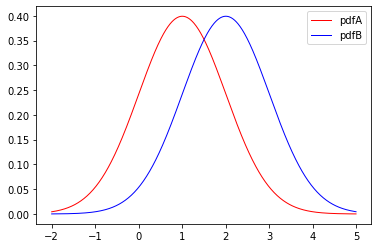

In [9]:
x_axis = numpy.arange(-2, 5, 0.01)


pdfA = [distrA.pdf(x=x) for x in x_axis]
pdfB = [distrB.pdf(x=x) for x in x_axis]


fig, ax = pyplot.subplots(1, 1)

ax.plot(x_axis, pdfA, 'r-', linewidth=1.0, label='pdfA')
ax.plot(x_axis, pdfB, 'b-', linewidth=1.0, label='pdfB')

ax.legend(loc='best', frameon=True)
pyplot.show()

In [10]:
numpy.random.seed(102)
sampleA = list(distrA.rvs(size=30))
sampleB = list(distrB.rvs(size=30))

In [11]:
sampleA

[2.668068295330041,
 1.9258618159721244,
 2.057996774523021,
 0.07966098625086515,
 2.299748465698081,
 1.3311830124378203,
 0.49015503210000777,
 0.09690108145802379,
 0.8699836272776194,
 -1.238203491279593,
 1.9731648808643085,
 0.9758151879432239,
 0.5150722464730657,
 -0.10926435778794974,
 0.4410252350263766,
 2.042386573297171,
 -0.7122627051288719,
 1.1361198859401953,
 0.5355560109291897,
 1.050979839345272,
 2.4478987114030124,
 1.5931384765383794,
 0.24438431706108832,
 0.37283446620527994,
 1.8840348851742916,
 1.1627177554108992,
 -1.502812865504238,
 1.410790990613312,
 1.7287504062808967,
 1.0291401975423198]

In [12]:
sampleB

[1.7089475415531687,
 2.3142930774833714,
 2.997189682643686,
 5.428562933868287,
 1.4214326506228363,
 1.7958369943434334,
 0.1328313428686212,
 3.443433945783731,
 2.403380035384565,
 1.3092345997983164,
 3.172287463495497,
 0.42887159609218717,
 2.8019923092217547,
 1.4280271380249927,
 3.5533937120121477,
 2.7012199793680898,
 3.0149926771961866,
 1.8819580354940142,
 0.9361090526003375,
 3.176691200509935,
 3.3476194394146184,
 1.2056999556326464,
 0.7200569686793563,
 2.556752762535625,
 1.9515962788550656,
 2.234364308041848,
 1.0163429114842202,
 3.0930050553495354,
 0.7487039712007708,
 3.481599808920302]

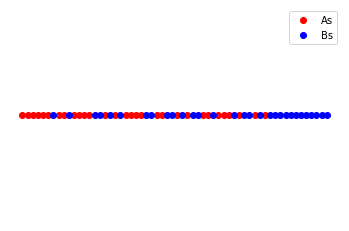

In [21]:
As = stats.rankdata(sampleA + sampleB)[0:len(sampleA)]
Bs = stats.rankdata(sampleA + sampleB)[len(sampleA):]

fig, ax = pyplot.subplots(1, 1)

ax.plot(As, numpy.zeros(len(As)), 'ro', label='As')
ax.plot(Bs, numpy.zeros(len(Bs)), 'bo', label='Bs')

pyplot.axis('off')

ax.legend(loc='best', frameon=True)
pyplot.show()

$U$ — число упорядоченных пар (красный < синий) в выборке.

In [13]:
U = 0
for a in sampleA:
    for b in sampleB:
        if b > a:
            U += 1
        if b == a:
            U += 0.5

print(f'U = {U} / {len(sampleA) * len(sampleB)}')

U = 702 / 900


<br><br><br><br><br>

In [14]:
# rankdata(a)[i] -- порядковый номер, который элемент a[i] занимал бы в отсортированном массиве a

a = [3, 12, 4, 10, 100, 5, 1]
stats.rankdata(a)

array([2., 6., 3., 5., 7., 4., 1.])

In [15]:
sum(stats.rankdata(sampleA + sampleB)[len(sampleA):]) - (len(sampleB) * (len(sampleB) + 1) / 2)

702.0

<br><br><br><br><br>

Пусть $\xi_A$ и $\xi_B$ — непрерывные случайные величины.

$H_0$: cлучайные величины $\xi_A$ и $\xi_B$ имеют одно распределение

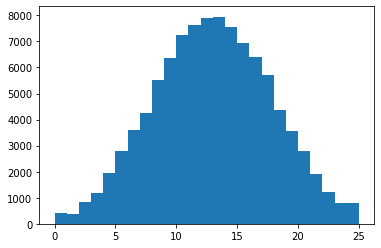

In [16]:
import math

distrA = stats.norm(loc=0, scale=1)
distrB = stats.norm(loc=0, scale=1)
MonteCarlo_sample = []
numpy.random.seed(102)

for i in range(100000):
    sampleA = list(distrA.rvs(size=5))
    sampleB = list(distrB.rvs(size=5))
    
    MonteCarlo_sample.append(
        sum(stats.rankdata(sampleA + sampleB)[0:len(sampleB)]) - (len(sampleB) * (len(sampleB) + 1) / 2)
    )

pyplot.hist(MonteCarlo_sample, bins=range(math.floor(min(MonteCarlo_sample)), math.ceil(max(MonteCarlo_sample)) + 1));

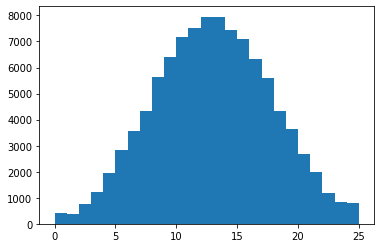

In [17]:
import math

distrA = stats.uniform(loc=0, scale=1)
distrB = stats.uniform(loc=0, scale=1)
MonteCarlo_sample = []
numpy.random.seed(102)

for i in range(100000):
    sampleA = list(distrA.rvs(size=5))
    sampleB = list(distrB.rvs(size=5))
    
    MonteCarlo_sample.append(
        sum(stats.rankdata(sampleA + sampleB)[0:len(sampleB)]) - (len(sampleB) * (len(sampleB) + 1) / 2)
    )

pyplot.hist(MonteCarlo_sample, bins=range(math.floor(min(MonteCarlo_sample)), math.ceil(max(MonteCarlo_sample)) + 1));

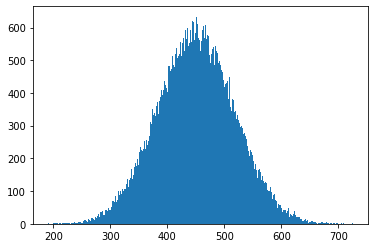

In [10]:
distrA = stats.norm.freeze(loc=1, scale=1)
distrB = stats.norm.freeze(loc=1, scale=1)
MonteCarlo_sample = []
numpy.random.seed(102)

for i in range(100000):
    sampleA = list(distrA.rvs(size=30))
    sampleB = list(distrB.rvs(size=30))
    
    MonteCarlo_sample.append(
        sum(stats.rankdata(sampleA + sampleB)[0:len(sampleA)]) - (len(sampleA) * (len(sampleA) - 1) / 2) - len(sampleA)
    )

pyplot.hist(MonteCarlo_sample, bins=range(math.floor(min(MonteCarlo_sample)), math.ceil(max(MonteCarlo_sample)) + 1));

In [ ]:
print(f'p-value is {2 * sum(s >= 702 for s in MonteCarlo_sample) / len(MonteCarlo_sample):.5f}')

<br><br><br><br><br>

In [19]:
distrA = stats.norm(loc=1, scale=1)
distrB = stats.norm(loc=2, scale=1)

numpy.random.seed(102)
sampleA = list(distrA.rvs(size=30))
sampleB = list(distrB.rvs(size=30))

stats.mannwhitneyu(sampleB, sampleA, alternative='greater')

MannwhitneyuResult(statistic=702.0, pvalue=0.00010029074789121345)